In [1]:
import pandas as pd
import json
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# **First steps**

## Questions:

What data in rotten_tomatoes_movies data is useful for a successful business?<br>
Does the audience review data have a correlation with budget?<br>
Does the production company have any effect on the audiece rating?<br>

![movies.db schema](Prebuilt_stuff/images/movies_db_schema.png)

In [2]:
#What is in this SQL table
conn = sqlite3.connect('Prebuilt_stuff\data\movies.db')
df_rotten_movies = pd.read_sql('''
SELECT *
FROM rotten_tomatoes_movies
''', conn)

In [3]:
#The sql information I want to clean and review, based on citation 1 (https://phys.org/news/2017-05-movies-highly-idiosyncraticand-odds-critics.html)
conn = sqlite3.connect('Prebuilt_stuff\data\movies.db')
r_movies_info = pd.read_sql('''
SELECT movie_title as title, production_company, audience_status, audience_rating, audience_count
FROM rotten_tomatoes_movies
''', conn)

In [4]:
r_movies_info_c = r_movies_info.dropna()

In [5]:
#Comparing how much data was dropped and reduced during stage one cleaning.
print(r_movies_info_c.shape)
df_rotten_movies.shape

(16832, 5)


(17712, 23)

### Rotten Tomatoe audience rating:

Using Rotten Tomatoes spilled rating score (https://www.rottentomatoes.com/about#whatisthetomatometer) comparing how many in the data base are upright or not.

In [6]:
# Need to create a new column as an int for analysis. Not sure what in this code is broken
# r_movies_info_c["audience_upright"] = r_movies_info_c.loc[(r_movies_info_c["audience_status"] == "Upright")]
# r_movies_info_c2 = r_movies_info_c.drop_duplicates('movie_title')

In [7]:
# Need to fix this cell!
# Upright = r_movies_info_c2.audience_upright.value_counts()
# filled = lambda x: 'Upright' if x == 1 else "Spilled"
# plt.bar([filled(x) for x in Upright.index], Upright.values)
# plt.title('Rotten Reviews Upright or Spilled');

In [8]:
# r_ratings_upright = r_movies_info_c2.loc[r_movies_info_c2["audience_upright"] == 1]
# Need to fix this cell!

In [9]:
r_movies_info_c2 = r_movies_info_c.drop_duplicates('title').copy()
df_production = r_movies_info_c2["production_company"].str.split('/',n = 3, expand = True)
df_production.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16276 entries, 0 to 17711
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16276 non-null  object
 1   1       310 non-null    object
 2   2       5 non-null      object
dtypes: object(3)
memory usage: 508.6+ KB


In [10]:
#df_production.loc[(df_production[1] != "None") & (df_production[2] != "None")]
#df_production.dropna()
df_production_solo = df_production.loc[(~df_production[0].index.isin(df_production[1].dropna().index)) & (~df_production[0].index.isin(df_production[2].dropna().index)), [0]]

In [11]:
# finding all the solo production company ratings
df_production_solo = df_production.loc[(~df_production[0].index.isin(df_production[1].dropna().index)) & (~df_production[0].index.isin(df_production[2].dropna().index)), [0]]
pc_names = df_production_solo[0].unique().tolist()
r_solopc = r_movies_info_c.loc[r_movies_info_c["production_company"].isin(pc_names)]
r_solopc

,title,production_company,audience_status,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,20th Century Fox,Spilled,53.0,254421.0
1,Please Give,Sony Pictures Classics,Upright,64.0,11574.0
2,10,Waner Bros.,Spilled,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),Criterion Collection,Upright,97.0,105386.0
4,"20,000 Leagues Under The Sea",Disney,Upright,74.0,68918.0
...,...,...,...,...,...
17707,Zoot Suit,MCA Universal Home Video,Upright,74.0,1195.0
17708,Zootopia,Walt Disney Animation Studios,Upright,92.0,101511.0
17709,Zorba the Greek,Fox,Upright,86.0,7146.0
17710,Zulu,Paramount Pictures,Upright,91.0,30193.0


In [12]:
#Does being a solo company mean more to the audience Upright counter
# Upright_solo = r_solopc.audience_upright.value_counts()
# filled_solo = lambda x: 'Upright' if x == 1 else "Spilled"
# plt.bar([filled_solo(x) for x in Upright_solo.index], Upright_solo.values)
# plt.title('Rotten Reviews Upright or Spilled when only one Production Company');

In [13]:
r_solopc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 17711
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               16459 non-null  object 
 1   production_company  16459 non-null  object 
 2   audience_status     16459 non-null  object 
 3   audience_rating     16459 non-null  float64
 4   audience_count      16459 non-null  float64
dtypes: float64(2), object(3)
memory usage: 771.5+ KB


In [14]:
r_solo_lessreviews = r_solopc.loc[r_solopc["audience_count"].apply(lambda x: 10 < x < 10000)]
r_solo_lessreviews.shape

(10604, 5)

In [15]:
r_solo_middle = r_solopc.loc[r_solopc["audience_count"].apply(lambda x: 10000 < x < 10000000)]
r_solo_middle.shape

(5732, 5)

In [16]:
r_solo_ten_million = r_solopc.loc[r_solopc["audience_count"].apply(lambda x:  x >= 10000000)]

In [17]:
r_solo_ten_million.shape

(50, 5)

### Graphs for Rotten Tomatoes Viewer Reviews vs Viewer Ratings

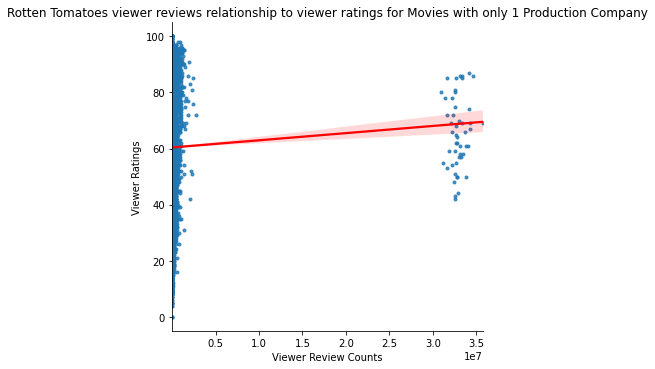

In [18]:
main_plot = sns.lmplot(data = r_solopc, x = "audience_count", y = "audience_rating", legend = True, markers=".", line_kws={'color': 'red'})
main_plot.set(title="Rotten Tomatoes viewer reviews relationship to viewer ratings for Movies with only 1 Production Company", xlabel="Viewer Review Counts", ylabel="Viewer Ratings");

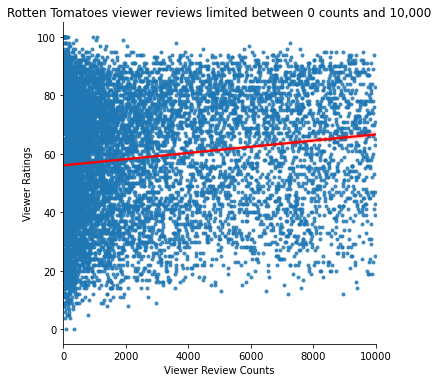

In [19]:
a_plot = sns.lmplot(data = r_solo_lessreviews, x = "audience_count", y = "audience_rating", legend = True , markers="." , line_kws={'color': 'red'})
a_plot.set(title="Rotten Tomatoes viewer reviews limited between 0 counts and 10,000", xlabel="Viewer Review Counts", ylabel="Viewer Ratings", xlim=(0, 10000));

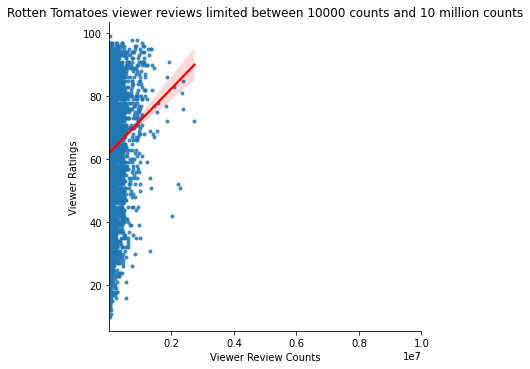

In [20]:
b_plot = sns.lmplot(data = r_solo_middle, x = "audience_count", y = "audience_rating", legend = True , markers="." , line_kws={'color': 'red'})
b_plot.set(title="Rotten Tomatoes viewer reviews limited between 10000 counts and 10 million counts", xlabel="Viewer Review Counts", ylabel="Viewer Ratings",xlim=(10000, 10000000));

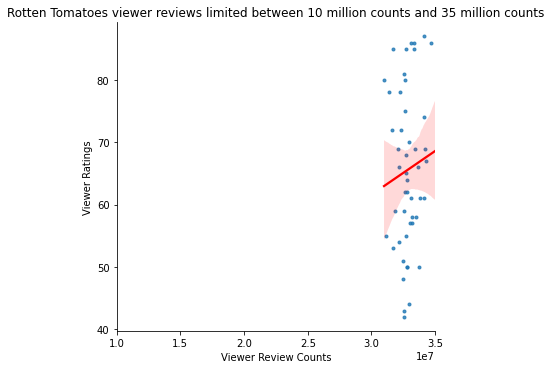

In [21]:
c_plot = sns.lmplot(data = r_solo_ten_million, x = "audience_count", y = "audience_rating", legend = True , markers="." , line_kws={'color': 'red'})
c_plot.set(title="Rotten Tomatoes viewer reviews limited between 10 million counts and 35 million counts", xlabel="Viewer Review Counts", ylabel="Viewer Ratings", xlim=(10000000, 35000000));

## Tomato Cleaning to use data from Budget information

In [22]:
conn = sqlite3.connect('Prebuilt_stuff\data\movies.db')
r_movie_title_clean = pd.read_sql('''
SELECT movie_title as title
FROM rotten_tomatoes_movies
''', conn)

In [23]:
r_movie_title_clean1 = r_movie_title_clean.drop_duplicates().copy()

In [24]:
r_movie_title_clean1.loc[3, ('title')] = "Twelve Angry Men"
r_movie_title_clean1.head(15)

,title
0,Percy Jackson & the Olympians: The Lightning T...
1,Please Give
2,10
3,Twelve Angry Men
4,"20,000 Leagues Under The Sea"
5,"10,000 B.C."
6,The 39 Steps
7,3:10 to Yuma
8,Charly (A Heartbeat Away)
9,Abraham Lincoln


In [25]:
# .replace('[^a-zA-Z0-9]', '_')r_movie_title_clean1.loc[:, "title"].apply(
r_movie_title_clean2 = r_movie_title_clean1.apply(lambda x: x.str.lower().str.replace('[^a-zA-Z0-9]', '_')).copy()

In [26]:
r_solopc

,title,production_company,audience_status,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,20th Century Fox,Spilled,53.0,254421.0
1,Please Give,Sony Pictures Classics,Upright,64.0,11574.0
2,10,Waner Bros.,Spilled,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),Criterion Collection,Upright,97.0,105386.0
4,"20,000 Leagues Under The Sea",Disney,Upright,74.0,68918.0
...,...,...,...,...,...
17707,Zoot Suit,MCA Universal Home Video,Upright,74.0,1195.0
17708,Zootopia,Walt Disney Animation Studios,Upright,92.0,101511.0
17709,Zorba the Greek,Fox,Upright,86.0,7146.0
17710,Zulu,Paramount Pictures,Upright,91.0,30193.0


### **Clean Movie Titles!!**

In [30]:
r_solopc["title"] = r_solopc["title"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()
# r_solopc.drop(columns="movie_title", inplace=True)

<ipython-input-30-3371cec4be52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_solopc["title"] = r_solopc["title"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()


In [31]:
r_solopc

,title,production_company,audience_status,audience_rating,audience_count
0,percy_jackson___the_olympians__the_lightning_t...,20th Century Fox,Spilled,53.0,254421.0
1,please_give,Sony Pictures Classics,Upright,64.0,11574.0
2,10,Waner Bros.,Spilled,53.0,14684.0
3,12_angry_men__twelve_angry_men_,Criterion Collection,Upright,97.0,105386.0
4,20_000_leagues_under_the_sea,Disney,Upright,74.0,68918.0
...,...,...,...,...,...
17707,zoot_suit,MCA Universal Home Video,Upright,74.0,1195.0
17708,zootopia,Walt Disney Animation Studios,Upright,92.0,101511.0
17709,zorba_the_greek,Fox,Upright,86.0,7146.0
17710,zulu,Paramount Pictures,Upright,91.0,30193.0


In [ ]:
r_solopc["title"]=r_solopc["clean_titles"]

In [ ]:
r_movie_title_clean2

In [ ]:
conn = sqlite3.connect('Prebuilt_stuff\data\movies.db')
df_moviename1 = pd.read_sql('''
SELECT title
FROM tmdb_movies
''', conn)

In [ ]:
df_movie_clean1 = df_moviename1.drop_duplicates().apply(lambda x: x.str.lower().str.replace('[^a-zA-Z0-9]', '_')).copy()
df_movie_clean1

In [ ]:
clean_movie_mix = df_movie_clean1.merge(r_movie_title_clean2, on=["title"], how="outer", indicator=("where")).copy()

In [ ]:
clean_movie_mix

In [ ]:
clean_movie_mix["where"].value_counts()

In [ ]:
sns.histplot(data = clean_movie_mix, x="where");

In [ ]:
full_clean_title = df_movie_clean1.merge(r_solopc, on=["title"], how="outer", indicator=("where")).copy()

In [ ]:
#One time upload to a csv
# full_clean_title.to_csv("Prebuilt_stuff/data/rotten_tomatoes_clean_titles.csv")

In [ ]:
df_1 = pd.read_csv('Prebuilt_stuff/data/zippedData/bom.movie_gross.csv.gz')
df_1.head()

In [ ]:
sns.scatterplot(data=df_1, x=df_1["title"].value_counts(), y=df_1['domestic_gross'])